# Image segmentation

Segmentation of an image by clustering pixels.

In [3]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt  # for imshow
import matplotlib.colors as colors
from scipy.cluster import vq     # for k-means and vq

%matplotlib inline

(-0.5, 189.5, 249.5, -0.5)

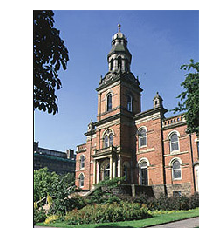

In [4]:
im = plt.imread('clothworkers.jpg')
im = im/255
plt.imshow(im)
plt.axis('off')

We first reshape the image into a 2D array with a row for each pixel, and three columns for RGB values.
Then, call kmeans with k=3, returning a kx3 codebook of RGB values for the k generated prototypes.
All pixels in the rows of x are then encoded with the index of the nearest prototype (this is 'vector quantisation').
Finally, turn off normalisation for colour mapping, and install the codebook as the colourmap. This means that the integer coded values will index directly into the corresponding entry in the colourmap.

[[ 0.46994709  0.58657739  0.79910683]
 [ 0.19273137  0.21611694  0.18054442]
 [ 0.70639498  0.64626843  0.54378285]]


(-0.5, 189.5, 249.5, -0.5)

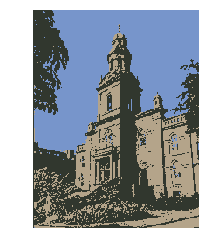

In [5]:
x = np.reshape(im,(-1,3))
k = 3
codebook, distortion = vq.kmeans(x,k)
code, dist = vq.vq(x,codebook)
code = np.reshape(code, im.shape[0:2])    # reshape the 1D code array into the original 2D image shape
print(codebook)

colors.NoNorm()
cmap = colors.ListedColormap(codebook)

plt.imshow(code, cmap=cmap)
plt.axis('off')    # turn off the axes

(-0.5, 189.5, 249.5, -0.5)

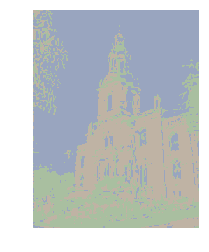

In [6]:
x = np.reshape(colors.rgb_to_hsv(im),(-1,3))
x = x[:,0:2]    # extract the first two columns of hue and saturation
x[:,1] = x[:,1]/2    # scale down the saturation
k = 3
codebook, distortion = vq.kmeans(x,k)
code, dist = vq.vq(x,codebook)
code = np.reshape(code, im.shape[0:2])    # reshape the 1D code array into the original 2D image shape
codebook = np.concatenate((codebook, np.full((k,1),0.75)),axis=1)    # add back in the V column, set to a constant
codebook = colors.hsv_to_rgb(codebook)

colors.NoNorm()
cmap = colors.ListedColormap(codebook)

plt.imshow(code, cmap=cmap)
plt.axis('off')    # turn off the axes